In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [2]:
from sklearn.tree import DecisionTreeClassifier

In [3]:
df = pd.read_csv('placed.csv')

In [4]:
df.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,0,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed
1,0,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed
2,0,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed
3,0,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed
4,0,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed


In [5]:
df.shape

(215, 13)

In [6]:
df.isnull().sum()

gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
dtype: int64

In [8]:
objList = df.select_dtypes(include = "object").columns
print (objList)

Index(['ssc_b', 'hsc_b', 'hsc_s', 'degree_t', 'workex', 'specialisation',
       'status'],
      dtype='object')


In [9]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for feat in objList:
    df[feat] = le.fit_transform(df[feat].astype(str))

print (df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          215 non-null    int64  
 1   ssc_p           215 non-null    float64
 2   ssc_b           215 non-null    int32  
 3   hsc_p           215 non-null    float64
 4   hsc_b           215 non-null    int32  
 5   hsc_s           215 non-null    int32  
 6   degree_p        215 non-null    float64
 7   degree_t        215 non-null    int32  
 8   workex          215 non-null    int32  
 9   etest_p         215 non-null    float64
 10  specialisation  215 non-null    int32  
 11  mba_p           215 non-null    float64
 12  status          215 non-null    int32  
dtypes: float64(5), int32(7), int64(1)
memory usage: 16.1 KB
None


In [12]:
df.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,0,67.00,1,91.00,1,1,58.00,2,0,55.0,1,58.80,1
1,0,79.33,0,78.33,1,2,77.48,2,1,86.5,0,66.28,1
2,0,65.00,0,68.00,0,0,64.00,0,0,75.0,0,57.80,1
3,0,56.00,0,52.00,0,2,52.00,2,0,66.0,1,59.43,0
4,0,85.80,0,73.60,0,1,73.30,0,0,96.8,0,55.50,1


Shows placed is 1 and not placed is 0

In [10]:
X = df.drop('status',axis=1)
y = df['status']

In [11]:
from sklearn.model_selection import train_test_split # X is train and # y is test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0,stratify= y)

# KNN

In [13]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train) #training data and traget has been provided to the algorithm
knn.score(X_train,y_train)#the data we are passing will be considered for the accuracy

0.9127906976744186

In [14]:
knn.score(X_test,y_test)

0.7674418604651163

# Decision Tree

In [15]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))

Accuracy on training set: 1.000


In [16]:
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on test set: 0.837


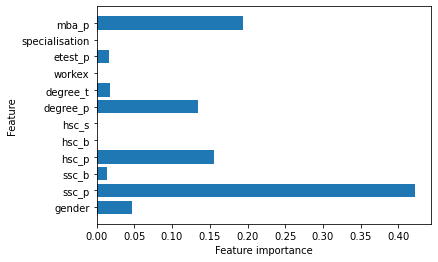

In [17]:
import matplotlib.pyplot as plt
def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X_train.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
plot_feature_importances(tree)

In [30]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=100, random_state=0)

forest.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))

print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.837


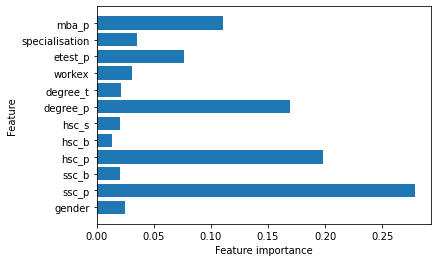

In [31]:
import matplotlib.pyplot as plt
def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X_train.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
plot_feature_importances(forest)

In [32]:
from sklearn.ensemble import GradientBoostingClassifier

gbrt = GradientBoostingClassifier(random_state=0,learning_rate=0.1)

gbrt.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))

print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.860


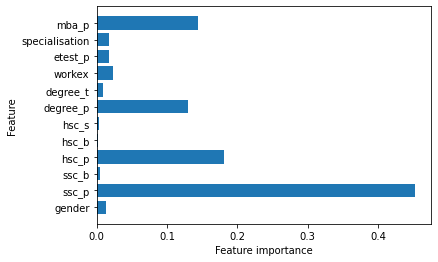

In [33]:
import matplotlib.pyplot as plt
def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X_train.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
plot_feature_importances(gbrt)

# k_means

In [18]:
from sklearn.cluster import KMeans

In [19]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X)
Xs = scaler.transform(X)
print(Xs)

[[0.         0.53823954 1.         ... 0.10416667 1.         0.28448276]
 [0.         0.79241394 0.         ... 0.76041667 0.         0.56484258]
 [0.         0.49701093 0.         ... 0.52083333 0.         0.2470015 ]
 ...
 [0.         0.53823954 1.         ... 0.1875     0.         0.69377811]
 [1.         0.68253968 1.         ... 0.41666667 1.         0.33808096]
 [0.         0.43516801 0.         ... 0.8125     1.         0.33770615]]


In [36]:
kmeans = KMeans(n_clusters=2,algorithm='auto') # You want cluster the passenger records into 2: Survived or Not survived
kmeans.fit(Xs)

KMeans(n_clusters=2)

In [37]:
correct = 0
for i in range(len(Xs)):
    NL = np.array(Xs[i].astype(float))
    NL = NL.reshape(-1, len(NL))
    prediction = kmeans.predict(NL)
    if prediction[0] == y[i]:
        correct += 1
print(correct/len(Xs))

0.5023255813953489


C:\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


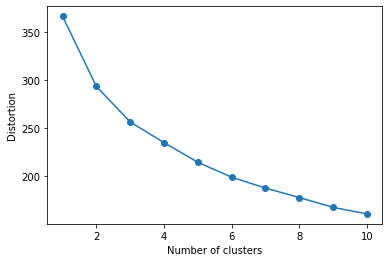

In [23]:
import matplotlib.pyplot  as plt
distortions = []
for i in range(1, 11):
    kmeans = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,random_state=0)
    kmeans.fit(Xs)
    distortions.append(kmeans.inertia_)

# plot
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

In [28]:
kmeans = KMeans(n_clusters=10,algorithm='auto') # You want cluster the passenger records into 2: Survived or Not survived
kmeans.fit(Xs)

KMeans(n_clusters=10)

In [29]:
correct = 0
for i in range(len(Xs)):
    NL = np.array(Xs[i].astype(float))
    NL = NL.reshape(-1, len(NL))
    prediction = kmeans.predict(NL)
    if prediction[0] == y[i]:
        correct += 1
print(correct/len(Xs))

0.14418604651162792
